In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.drop('Id',axis=1,inplace=True)
df.head()

In [ ]:
df['Species'].unique()

In [ ]:
dummies=pd.get_dummies(df['Species'], prefix='Species')

In [ ]:
df.columns

In [ ]:
df=pd.concat([df,dummies],axis=1)

In [ ]:
df.rename(columns={'Species_Iris-setosa':'Species_setosa'}, inplace=True)

In [ ]:
df.rename(columns={'Species_Iris-virginica':'Species_virginica'}, inplace=True)

In [ ]:
df.rename(columns={'Species_Iris-versicolor':'Species_versicolor'}, inplace=True)

In [ ]:
correlacion=df.corr()

In [ ]:
alta_corr=np.where((correlacion>0.95)&(correlacion<1))
alta_corr

In [ ]:
baja_corr=np.where((correlacion<-0.95)&(correlacion>-1))
baja_corr

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
df.drop('Species',axis=1,inplace=True)


In [ ]:
df_estandar =scaler.fit_transform(df)

In [ ]:
df_estandar

array([[-0.90068117,  1.03205722, -1.3412724 , ...,  1.41421356,
        -0.70710678, -0.70710678],
       [-1.14301691, -0.1249576 , -1.3412724 , ...,  1.41421356,
        -0.70710678, -0.70710678],
       [-1.38535265,  0.33784833, -1.39813811, ...,  1.41421356,
        -0.70710678, -0.70710678],
       ...,
       [ 0.79566902, -0.1249576 ,  0.81962435, ..., -0.70710678,
        -0.70710678,  1.41421356],
       [ 0.4321654 ,  0.80065426,  0.93335575, ..., -0.70710678,
        -0.70710678,  1.41421356],
       [ 0.06866179, -0.1249576 ,  0.76275864, ..., -0.70710678,
        -0.70710678,  1.41421356]])

convertir a data frame

In [ ]:
df_estandar=pd.DataFrame(df_estandar,columns=df.columns)

In [ ]:
df_estandar

In [ ]:
from sklearn.model_selection import train_test_split
entrenamiento, prueba = train_test_split(df_estandar, test_size=0.20, random_state=42)

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species_setosa', 'Species_versicolor', 'Species_virginica'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula='SepalLengthCm~SepalWidthCm+PetalLengthCm+PetalWidthCm+PetalWidthCm+Species_setosa+Species_versicolor',data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     145.7
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           8.28e-48
Time:                        00:08:44   Log-Likelihood:                -49.544
No. Observations:                 120   AIC:                             111.1
Df Residuals:                     114   BIC:                             127.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0227      0

t=z,, columna izquierda =r, se usa coeficiente,

In [ ]:
y_aprox=0.2734*prueba['SepalWidthCm'] + 1.8574*prueba['PetalLengthCm'] - 0.4296*prueba['PetalWidthCm'] + 0.5349*prueba['Species_setosa'] + 0.3707 *prueba['Species_versicolor']

In [ ]:
y_aprox

In [ ]:
tabla=pd.DataFrame({'Real':prueba['SepalLengthCm'],'Prediccion':y_aprox, 'Errores':prueba['SepalLengthCm']-y_aprox})

In [ ]:
tabla

Text(0, 0.5, 'prediccion')

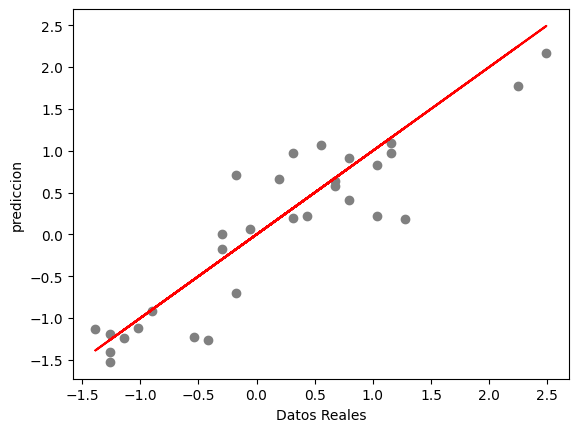

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(prueba['SepalLengthCm'], y_aprox, color='gray')
plt.plot(prueba['SepalLengthCm'], prueba['SepalLengthCm'], color='red')
plt.xlabel("Datos Reales")
plt.ylabel("prediccion")

In [ ]:
residuos = len(tabla['Errores'])


Text(0, 0.5, 'valor del residuo')

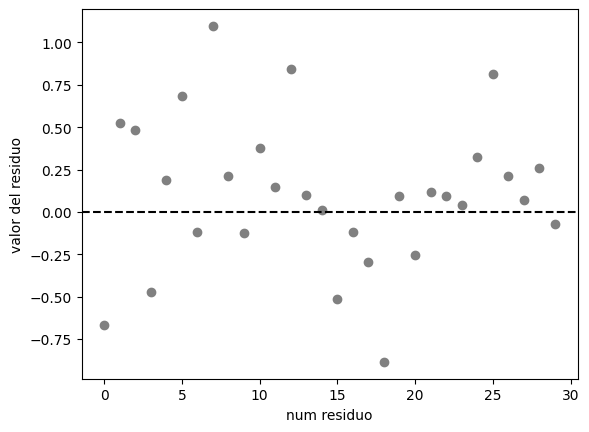

In [ ]:
plt.scatter(range(residuos), tabla['Errores'], color= 'gray')
plt.axhline(y=0, linestyle='--', color='black')
plt.xlabel("num residuo")
plt.ylabel("valor del residuo")

Text(0, 0.5, 'frecuencia')

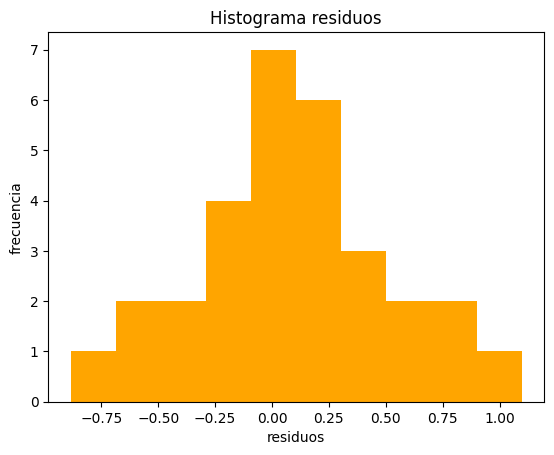

In [ ]:
plt.hist(x=tabla['Errores'], color= 'orange')
plt.title("Histograma residuos")
plt.xlabel("residuos")
plt.ylabel("frecuencia")

In [ ]:
media=tabla['Errores'].mean()
std=tabla['Errores'].std()
Errores_est=(tabla['Errores']-media)/std


In [ ]:
import statsmodels.api as sm
from scipy import stats
stats.kstest(Errores_est, 'norm')

KstestResult(statistic=0.10320150426735608, pvalue=0.8744274339500517, statistic_location=0.24506899612753244, statistic_sign=1)